### 0. Importing all necessary libraries

In [1]:
# For data frame operations
import pandas as pd

# Array conversion
import numpy as np   
import re
import string
import random

# For plots
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

# Word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# ML libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### I. Dataset

In [2]:
# Read the SMS Spam text dataset
pesan = pd.read_csv('dataset_spam_I2.csv')
pesan.head(1143)

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
5,5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket ...,2
6,"Ada iRing dgn tarif Rp. 0,1/7hr (perpanjangan ...",2
7,Akhir bulan harus tetap eksis loh! Internetan ...,2
8,Aktifkan iRing Coboy Jr - Terhebat. Tekan *808...,2
9,Ambil bonus harianmu di *600# (Bebas Pulsa). D...,2


In [3]:
# Display 
teks = pesan["Teks"]
teks

0       [PROMO] Beli paket Flash mulai 1GB di MY TELKO...
1       2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...
2       2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...
3       2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...
4       4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...
5       5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket ...
6       Ada iRing dgn tarif Rp. 0,1/7hr (perpanjangan ...
7       Akhir bulan harus tetap eksis loh! Internetan ...
8       Aktifkan iRing Coboy Jr - Terhebat. Tekan *808...
9       Ambil bonus harianmu di *600# (Bebas Pulsa). D...
10      Anda akan berhenti berlangganan Paket Flash. K...
11      Anda akan berlangganan paket Rp. 10000 utk 150...
12      Anda akan membeli Paket Gampang Internetan Rp....
13      Anda akan menerima setting ponsel, agar ponsel...
14      Anda akan mengaktifkan Paket BBM Gratis berlak...
15      Anda mendapatkan 1 kupon dalam program Kartu A...
16      Anda sedang menikmati Paket Reguler dgn sisa k...
17      Anda t

In [4]:
pesan ['label'].value_counts()

2    574
1    569
Name: label, dtype: int64

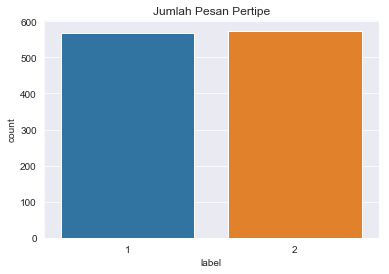

In [5]:
# Visualize the class ditribution in the dataset

sns.countplot('label', data=pesan)
plt.title('Jumlah Pesan Pertipe')
plt.show()  # ham is the major class, Spam is minor

### II. Preprocessing Data

In [6]:
#menghilangkan tanda baca
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#dmenghilangkan tanda-tanda
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
pesan['Data_Bersih']= pesan['Teks'].apply(lambda x:remove_punctuation(x))
pesan.head()

,Teks,label,Data_Bersih
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,PROMO Beli paket Flash mulai 1GB di MY TELKOMS...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,25 GB30 hari hanya Rp 35 Ribu Spesial buat And...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,20160708 114711Plg Yth sisa kuota Flash Anda 4...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,20160807 112947Plg Yth sisa kuota Flash Anda 7...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,45GB30 hari hanya Rp 55 Ribu Spesial buat anda...


In [8]:
#Case folding
pesan['Pesan_Kecil']= pesan['Data_Bersih'].apply(lambda x: x.lower())
pesan.head()

,Teks,label,Data_Bersih,Pesan_Kecil
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,PROMO Beli paket Flash mulai 1GB di MY TELKOMS...,promo beli paket flash mulai 1gb di my telkoms...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,25 GB30 hari hanya Rp 35 Ribu Spesial buat And...,25 gb30 hari hanya rp 35 ribu spesial buat and...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,20160708 114711Plg Yth sisa kuota Flash Anda 4...,20160708 114711plg yth sisa kuota flash anda 4...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,20160807 112947Plg Yth sisa kuota Flash Anda 7...,20160807 112947plg yth sisa kuota flash anda 7...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,45GB30 hari hanya Rp 55 Ribu Spesial buat anda...,45gb30 hari hanya rp 55 ribu spesial buat anda...


In [9]:
# menghilangkan angka
def remove(hasil):
    #remove angka
    hasil = re.sub('[0-9]+', '', hasil)
    return hasil
pesan['Hilang_angka']= pesan['Pesan_Kecil'].apply(lambda x: remove(x))
pesan.head()


,Teks,label,Data_Bersih,Pesan_Kecil,Hilang_angka
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,PROMO Beli paket Flash mulai 1GB di MY TELKOMS...,promo beli paket flash mulai 1gb di my telkoms...,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,25 GB30 hari hanya Rp 35 Ribu Spesial buat And...,25 gb30 hari hanya rp 35 ribu spesial buat and...,gb hari hanya rp ribu spesial buat anda yang...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,20160708 114711Plg Yth sisa kuota Flash Anda 4...,20160708 114711plg yth sisa kuota flash anda 4...,plg yth sisa kuota flash anda kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,20160807 112947Plg Yth sisa kuota Flash Anda 7...,20160807 112947plg yth sisa kuota flash anda 7...,plg yth sisa kuota flash anda kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,45GB30 hari hanya Rp 55 Ribu Spesial buat anda...,45gb30 hari hanya rp 55 ribu spesial buat anda...,gb hari hanya rp ribu spesial buat anda yang ...


In [10]:
#mengihlangkan
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

pesan['Hlang_whitespace'] = pesan['Hilang_angka'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
#def remove_whitespace_multiple(text):
    #return re.sub('\s+',' ',text)

#pesan['Hlang_whitespace'] = pesan['Hlang_whitespace'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

pesan['Hilang_huruf'] = pesan['Hlang_whitespace'].apply(lambda x: remove_singl_char(x))
pesan.head()


,Teks,label,Data_Bersih,Pesan_Kecil,Hilang_angka,Hlang_whitespace,Hilang_huruf
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,PROMO Beli paket Flash mulai 1GB di MY TELKOMS...,promo beli paket flash mulai 1gb di my telkoms...,promo beli paket flash mulai gb di my telkomse...,promo beli paket flash mulai gb di my telkomse...,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,25 GB30 hari hanya Rp 35 Ribu Spesial buat And...,25 gb30 hari hanya rp 35 ribu spesial buat and...,gb hari hanya rp ribu spesial buat anda yang...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,20160708 114711Plg Yth sisa kuota Flash Anda 4...,20160708 114711plg yth sisa kuota flash anda 4...,plg yth sisa kuota flash anda kb download myt...,plg yth sisa kuota flash anda kb download myte...,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,20160807 112947Plg Yth sisa kuota Flash Anda 7...,20160807 112947plg yth sisa kuota flash anda 7...,plg yth sisa kuota flash anda kb download myt...,plg yth sisa kuota flash anda kb download myte...,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,45GB30 hari hanya Rp 55 Ribu Spesial buat anda...,45gb30 hari hanya rp 55 ribu spesial buat anda...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...


In [11]:
#Tokenization
import nltk
nltk.download('punkt')

def word_tokenize_wrapper(text):
    return word_tokenize(text)

pesan['Data_token'] = pesan['Hilang_huruf'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(pesan['Data_token'])
print('\n\n\n')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Tokenizing Result : 

0       [promo, beli, paket, flash, mulai, gb, di, my,...
1       [gb, hari, hanya, rp, ribu, spesial, buat, and...
2       [plg, yth, sisa, kuota, flash, anda, kb, downl...
3       [plg, yth, sisa, kuota, flash, anda, kb, downl...
4       [gb, hari, hanya, rp, ribu, spesial, buat, and...
5       [hari, lagi, ekstra, pulsa, rb, dg, beli, pake...
6       [ada, iring, dgn, tarif, rp, hr, perpanjangan,...
7       [akhir, bulan, harus, tetap, eksis, loh, inter...
8       [aktifkan, iring, coboy, jr, terhebat, tekan, ...
9       [ambil, bonus, harianmu, di, bebas, pulsa, dpt...
10      [anda, akan, berhenti, berlangganan, paket, fl...
11      [anda, akan, berlangganan, paket, rp, utk, mb,...
12      [anda, akan, membeli, paket, gampang, internet...
13      [anda, akan, menerima, setting, ponsel, agar, ...
14      [anda, akan, mengaktifkan, paket, bbm, gratis,...
15      [anda, mendapatkan, kupon, dalam, program, kar...
16      [anda, sedang, menikmati, paket, reguler, 

In [12]:
def freqDist(text):
    return FreqDist(text)

pesan['kata_sering'] = pesan['Data_token'].apply(freqDist)

print('Jumlah PerKata : \n') 
print(pesan['kata_sering'].apply(lambda x : x.most_common()))


Jumlah PerKata : 

0       [(gb, 2), (di, 2), (extra, 2), (promo, 1), (be...
1       [(aktifkan, 2), (sekarang, 2), (gb, 1), (hari,...
2       [(flash, 2), (plg, 1), (yth, 1), (sisa, 1), (k...
3       [(flash, 2), (plg, 1), (yth, 1), (sisa, 1), (k...
4       [(gb, 1), (hari, 1), (hanya, 1), (rp, 1), (rib...
5       [(di, 2), (hari, 1), (lagi, 1), (ekstra, 1), (...
6       [(rp, 2), (hr, 2), (ada, 1), (iring, 1), (dgn,...
7       [(di, 2), (akhir, 1), (bulan, 1), (harus, 1), ...
8       [(iring, 4), (aktifkan, 3), (info, 2), (noah, ...
9       [(ambil, 1), (bonus, 1), (harianmu, 1), (di, 1...
10      [(anda, 2), (paket, 2), (akan, 1), (berhenti, ...
11      [(anda, 2), (paket, 2), (utk, 2), (mb, 2), (ta...
12      [(utk, 2), (anda, 1), (akan, 1), (membeli, 1),...
13      [(anda, 3), (ponsel, 2), (akan, 1), (menerima,...
14      [(anda, 1), (akan, 1), (mengaktifkan, 1), (pak...
15      [(kupon, 2), (anda, 1), (mendapatkan, 1), (dal...
16      [(paket, 2), (anda, 1), (sedang, 1), (menikma

In [13]:
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'gt', 'lg','wkwk','tp', 'jg','udah',
                       'rb','rg','sd','st','teh','blm', 'my','gb','rp','plg','yth','kb'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

pesan['stopword'] = pesan['Data_token'].apply(stopwords_removal) 


pesan['stopword'].head(100)


0     [promo, beli, paket, flash, telkomsel, app, dp...
1     [ribu, spesial, terpilih, aktifkan, promo, nov...
2     [sisa, kuota, flash, download, mytelkomsel, ap...
3     [sisa, kuota, flash, download, mytelkomsel, ap...
4      [ribu, spesial, terpilih, aktifkan, buruan, skb]
5     [ekstra, pulsa, beli, paket, internet, bulanan...
6     [iring, tarif, hr, perpanjangan, hr, hits, arm...
7     [eksis, internetan, pake, volume, ultima, mbhr...
8     [aktifkan, iring, coboy, jr, terhebat, tekan, ...
9     [ambil, bonus, harianmu, bebas, pulsa, dptkan,...
10    [berhenti, berlangganan, paket, flash, ketik, ...
11    [berlangganan, paket, mb, gg, mb, ghari, setuj...
12    [membeli, paket, gampang, internetan, chatting...
13    [menerima, setting, ponsel, ponsel, mengakses,...
14    [mengaktifkan, paket, bbm, gratis, berlaku, ka...
15    [kupon, program, kartu, as, biber, beli, inter...
16    [menikmati, paket, reguler, sisa, kuota, kbdap...
17    [terdaftar, layanan, paket, malam, berlang

In [15]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}

for document in pesan['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '     
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

pesan['Data_Stemmer'] = pesan['stopword'].apply(get_stemmed_term)
print(pesan['Data_Stemmer'])

4131
------------------------
promo : promo
beli : beli
paket : paket
flash : flash
telkomsel : telkomsel
app : app
dpt : dpt
extra : extra
kuota : kuota
lte : lte
nelpon : nelpon
mnthr : mnthr
buruan : buru
cek : cek
tselmemytsel : tselmemytsel
sk : sk
ribu : ribu
spesial : spesial
terpilih : pilih
aktifkan : aktif
nov : nov
sisa : sisa
download : download
mytelkomsel : mytelkomsel
apps : apps
httptselmetsel : httptselmetsel
kuotabeli : kuotabeli
hub : hub
skb : skb
ekstra : ekstra
pulsa : pulsa
internet : internet
bulanan : bulan
pembelian : beli
sjk : sjk
augsept : augsept
detail : detail
iring : iring
tarif : tarif
hr : hr
perpanjangan : panjang
hits : hits
armada : armada
pencuri : curi
hati : hati
tekan : tekan
okcall : okcall
info : info
eksis : eks
internetan : internetan
pake : pake
volume : volume
ultima : ultima
mbhr : mbhr
hrga : hrga
tariflokasi : tariflokasi
tselmefl : tselmefl
coboy : coboy
jr : jr
terhebat : hebat
terbaru : baru
noah : noah
engkau : engkau
hp : hp
ketik

stasiunbandara : stasiunbandara
grabtravel : grabtravel
september : september
hatur : hatur
nuhun : nuhun
tagihan : tagih
listrik : listrik
token : token
hubungi : hubung
menu : menu
hai : hai
kabar : kabar
meriah : riah
minimun : minimun
langsung : langsung
rla : rla
hallo : hallo
bro : bro
koin : koin
games : games
yuk : yuk
mudah : mudah
banget : banget
sob : sob
httptselmejajanonline : httptselmejajanonline
urang : urang
minang : mang
ado : ado
rancak : rancak
group : group
kampuang : kampuang
guy : guy
xl : xl
music : music
streaming : streaming
nelpsms : nelpsms
daftar : daftar
seribu : ribu
sekrang : sekrang
tlb : tlb
gbgbg : gbgbg
gbg : gbg
bronet : bronet
bronetspecial : bronetspecial
jamgb : jamgb
paketnya : paket
special : special
rabu : rabu
blanja : blanja
blanjacom : blanjacom
bljcotcashrabu : bljcotcashrabu
senin : senin
nonton : nonton
cinema : cema
xxi : xxi
kunjungi : kunjung
skrng : skrng
nrml : nrml
lagistok : lagistok
terbatassd : terbatassd
agtskinfodlj : agtskinf

yaok : yaok
terheboh : heboh
artisartis : artisartis
top : top
menittlp : menittlp
menitvideo : menitvideo
yesok : yesok
terkini : kini
ungkapin : ungkapin
dipikiranmu : pikir
httpsstorelineme : httpsstorelineme
stickershop : stickershop
aneka : aneka
merchants : merchants
partner : partner
thank : thank
you : you
appreciation : appreciation
trust : trust
in : in
using : using
further : further
feedback : feedback
please : please
advice : advice
text : text
freefor : freefor
tingkatkan : tingkat
rpribu : rpribu
pernuh : pernuh
dapet : dapet
trmksh : trmksh
mengisi : isi
jualan : jual
pulsabayar : pulsabayar
listrikspeedytelkom : listrikspeedytelkom
hubagen : hubagen
barokahmp : barokahmp
reloadpasti : reloadpasti
untung : untung
up : up
coins : coins
themes : themes
koleksimu : koleksi
use : use
invite : invite
nxmvfue : nxmvfue
ride : ride
redeem : redeem
it : it
httpswwwubercominvitenxmvfue : httpswwwubercominvitenxmvfue
penuh : penuh
batasankami : batasankami
kebebasa : kebebasa
kuo

prelaunchprofit : prelaunchprofit
roi : roi
libur : libur
th : th
tsm : tsm
desjan : desjan
wwwhquarterscoid : wwwhquarterscoid
indomarcocell : indomarcocell
menawarkan : tawar
jdi : jdi
agenpulsa : agenpulsa
mkios : mkios
chip : chip
oprator : oprator
ketikdaftar : ketikdaftar
melukiskan : lukis
ku : ku
indosatpoin : indosatpoin
simcard : simcard
mdpt : mdpt
pinbchdi : pinbchdi
sahkan : sahkan
ptindosat : ptindosat
wwwinfoindosatpoinwebscom : wwwinfoindosatpoinwebscom
indovison : indovison
rbu : rbu
pasangbonus : pasangbonus
fc : fc
hsil : hsil
nohp : nohp
xxxxx : xxxxx
ad : ad
wwwberkatisiulangpulsawebscom : wwwberkatisiulangpulsawebscom
sbgi : sbgi
semarak : semarak
ptindofood : ptindofood
pinhadiah : pinhadiah
klikwwwsemarakundianpopmiewebscom : klikwwwsemarakundianpopmiewebscom
terhormat : hormat
pesta : pesta
care : care
piner : per
undi : undi
pkl : pkl
sctv : sctv
wwwcareblogspotcom : wwwcareblogspotcom
kepadabpkibu : kepadabpkibu
wwwtricareblogspotcom : wwwtricareblogspotcom
t

wwwindosatpoinpluswebscom : wwwindosatpoinpluswebscom
indofood : indofood
fhx : fhx
klikwwwpopmieindofoodwebscom : klikwwwpopmieindofoodwebscom
ythsaya : ythsaya
mba : mba
muliani : muliani
hadiahnya : hadiah
pulsapin : pulsapin
wwwtricardblogspotcom : wwwtricardblogspotcom
rezky : rezky
afr : afr
wwwbonustriblogspotcom : wwwbonustriblogspotcom
memenangkan : menang
rpjutadri : rpjutadri
ulanag : ulanag
tripin : tripin
andaafr : andaafr
new : new
pinjf : pinjf
lenkap : lenkap
wwwinfoundiancareblogspotcom : wwwinfoundiancareblogspotcom
wwwinfogebyarhadiahcareblogspotcoid : wwwinfogebyarhadiahcareblogspotcoid
wwwinfohadiahcareblogspotcoid : wwwinfohadiahcareblogspotcoid
noxv : noxv
httptriwebnodecom : httptriwebnodecom
mencocokkan : cocok
ythmkios : ythmkios
pendaftaran : daftar
pln : pln
nosimcard : nosimcard
andaerd : andaerd
wwwhadiahpoinblogspotcom : wwwhadiahpoinblogspotcom
melapormhub : melapormhub
pembayarannya : bayar
telponsms : telponsms
bpkdedy : bpkdedy
hpterima : hpterima
sof

ztkm : ztkm
wwwinfohadiahtricareml : wwwinfohadiahtricareml
lngsung : lngsung
rpjtuinfo : rpjtuinfo
drshmulyadi : drshmulyadi
pelaksanatelkomsel : pelaksanatelkomsel
seminar : seminar
denpasar : denpasar
mewakili : wakil
kemahasiswaan : mahasiswa
kewirausahaan : kewirausahaan
transport : transport
peserta : serta
semnasdikti : semnasdikti
direktur : direktur
dikti : dikti
prof : prof
purwanto : purwanto
msi : msi
wahyudin : wahyudin
zarkasi : zarkasi
referensi : referensi
ptx : ptx
yunit : yunit
slmat : slmat
bantuan : bantu
rpjtdr : rpjtdr
hubirhjmuliyadi : hubirhjmuliyadi
pelaksanapt : pelaksanapt
pemenanglm : pemenanglm
lnfo : lnfo
klikwwwkejutanbimatriblogspotcom : klikwwwkejutanbimatriblogspotcom
hdiah : hdiah
andam : andam
uinfohubpakh : uinfohubpakh
risal : risal
mdpat : mdpat
rwd : rwd
wwwindosatidjimdocom : wwwindosatidjimdocom
drpengundian : drpengundian
bc : bc
silakan : sila
wwwtelkomselpoinwebscom : wwwtelkomselpoinwebscom
diundi : undi
rctiinfo : rctiinfo
serianto : seria

dipake : dipake
diruangan : ruang
alamatnya : alamat
dmn : dmn
jtbln : jtbln
fasilitasnya : fasilitas
hangat : hangat
kamar : kamar
mandi : mandi
kabel : kabel
wifi : wifi
meja : meja
tdr : tdr
lemari : lemari
instagram : instagram
perasaan : asa
nyesel : nyesel
asa : asa
merhatin : merhatin
ngerangkul : ngerangkul
pribadi : pribadi
hmm : hmm
pladishare : pladishare
grup : grup
keliatan : liat
bahagia : bahagia
one : one
of : of
million : million
kayaknya : kayak
dikpad : dikpad
kontaknya : kontak
mandinya : mandi
ikan : ikan
tempe : tempe
gagal : gagal
pacaran : pacar
eh : eh
alesannya : alesannya
nyakitin : nyakitin
pret : pret
jagain : jagain
jodoh : jodoh
ah : ah
ruangan : ruang
daya : daya
fpmipa : fpmipa
diumumkan : umum
aduh : aduh
ge : ge
pusing : pusing
lamaran : lamar
nyari : nyari
kebutuhan : butuh
aigoo : aigoo
chatnyaa : chatnyaa
hehehe : hehehe
airnya : air
lancar : lancar
ajakin : ajakin
soekarno : soekarno
hatta : hatta
makan : makan
eatboss : eatboss
wkwkw : wkwkw
spag

enakaa : enakaa
ajaaa : ajaaa
diantar : antar
cowok : cowok
dijmput : dijmput
semalam : malam
brgkt : brgkt
eta : eta
dokter : dokter
maksud : maksud
pasien : pasien
meren : meren
pariksa : pariksa
saha : saha
lembar : lembar
kamrin : kamrin
anto : anto
bab : bab
diparafrase : parafrase
kalimatnya : kalimat
paste : paste
jumatan : jumat
kanto : kanto
food : food
beras : beras
birthday : birthday
gaaais : gaaais
semenit : menit
penamaannya : nama
kyk : kyk
gaes : gaes
drakor : drakor
yawww : yawww
matiin : matiin
kke : kke
nyerahin : nyerahin
paedi : paedi
hard : hard
jilid : jilid
source : source
chat : chat
dibaca : baca
dipahami : paham
ulg : ulg
😂😂 : 
unisba : unisba
angkot : angkot
ngantor : ngantor
sekalulian : sekalulian
kyknya : kyknya
bls : bls
gmn : gmn
tia : tia
blg : blg
lapangan : lapang
tanyain : tanyain
gajadi : gajadi
gadiabsen : gadiabsen
telatnya : telat
lebib : lebib
kayanya : kaya
kwkw : kwkw
percaya : percaya
dosa : dosa
tanggung : tanggung
mobprog : mobprog
dicek :

pantesan : pantesan
dipusatnya : pusat
koneksi : koneksi
kelurahan : lurah
oge : oge
oiya : oiya
knapa : knapa
bsa : bsa
begitusayang : begitusayang
tabungannya : tabung
kehadiran : hadir
blokir : blokir
smsin : smsin
asmul : asmul
kbtulan : kbtulan
wife : wife
diagnosapasien : diagnosapasien
okayyy : okayyy
dsni : dsni
redaan : reda
hujannya : hujan
dtggu : dtggu
dp : dp
revisi : revisi
okeee : okeee
telor : telor
butuhnya : butuh
segimana : segimana
okeyyy : okeyyy
ajanya : aja
oo : oo
dit : dit
ooh : ooh
controler : controler
modelnya : model
ouhhh : ouhhh
yaudah : yaudah
ngedeteksi : ngedeteksi
output : output
tombol : tombol
algoritma : algoritma
ngerti : ngerti
jamber : jamber
pesanan : pesan
bumenu : bumenu
budiantar : budiantar
yanuhun : yanuhun
titip : titip
trus : trus
bujuk : bujuk
seporsi : porsi
pesen : sen
goreng : goreng
graha : graha
desilla : desilla
remed : remed
indeks : indeks
diturunin : diturunin
kemaren : kemaren
penilaiannya : nilai
mining : mining
ik : ik
pengi

sebelah : belah
warteg : warteg
bahri : bahri
sebrangnya : sebrangnya
yooo : yooo
umumin : umumin
kerudung : kerudung
kirain : kirain
warna : warna
jins : jins
beaok : beaok
bwrangkat : bwrangkat
pagimau : pagimau
cas : cas
atay : atay
tranfer : tranfer
{'promo': 'promo', 'beli': 'beli', 'paket': 'paket', 'flash': 'flash', 'telkomsel': 'telkomsel', 'app': 'app', 'dpt': 'dpt', 'extra': 'extra', 'kuota': 'kuota', 'lte': 'lte', 'nelpon': 'nelpon', 'mnthr': 'mnthr', 'buruan': 'buru', 'cek': 'cek', 'tselmemytsel': 'tselmemytsel', 'sk': 'sk', 'ribu': 'ribu', 'spesial': 'spesial', 'terpilih': 'pilih', 'aktifkan': 'aktif', 'nov': 'nov', 'sisa': 'sisa', 'download': 'download', 'mytelkomsel': 'mytelkomsel', 'apps': 'apps', 'httptselmetsel': 'httptselmetsel', 'kuotabeli': 'kuotabeli', 'hub': 'hub', 'skb': 'skb', 'ekstra': 'ekstra', 'pulsa': 'pulsa', 'internet': 'internet', 'bulanan': 'bulan', 'pembelian': 'beli', 'sjk': 'sjk', 'augsept': 'augsept', 'detail': 'detail', 'iring': 'iring', 'tarif': '

0       [promo, beli, paket, flash, telkomsel, app, dp...
1       [ribu, spesial, pilih, aktif, promo, nov, buru...
2       [sisa, kuota, flash, download, mytelkomsel, ap...
3       [sisa, kuota, flash, download, mytelkomsel, ap...
4                [ribu, spesial, pilih, aktif, buru, skb]
5       [ekstra, pulsa, beli, paket, internet, bulan, ...
6       [iring, tarif, hr, panjang, hr, hits, armada, ...
7       [eks, internetan, pake, volume, ultima, mbhr, ...
8       [aktif, iring, coboy, jr, hebat, tekan, info, ...
9       [ambil, bonus, hari, bebas, pulsa, dptkan, gra...
10      [henti, langgan, paket, flash, ketik, flashspa...
11      [langgan, paket, mb, gg, mb, ghari, tuju, bala...
12      [beli, paket, gampang, internetan, chatting, p...
13      [terima, setting, ponsel, ponsel, akses, inter...
14      [aktif, paket, bbm, gratis, laku, kali, aktiva...
15      [kupon, program, kartu, as, biber, beli, inter...
16      [nikmat, paket, reguler, sisa, kuota, kbdapatk...
17      [dafta

In [16]:
pesan.to_csv("Text_Preprocessing.csv")

### III. Wordcloud Analysis

In [16]:
pesan = pd.read_csv('Text_Preprocessing.csv')
pesan.head()

,Unnamed: 0,Teks,label,Data_Bersih,Pesan_Kecil,Hilang_angka,Hlang_whitespace,Hilang_huruf,Data_token,kata_sering,stopword,Data_Stemmer
0,0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,PROMO Beli paket Flash mulai 1GB di MY TELKOMS...,promo beli paket flash mulai 1gb di my telkoms...,promo beli paket flash mulai gb di my telkomse...,promo beli paket flash mulai gb di my telkomse...,promo beli paket flash mulai gb di my telkomse...,"['promo', 'beli', 'paket', 'flash', 'mulai', '...",<FreqDist with 22 samples and 25 outcomes>,"['promo', 'beli', 'paket', 'flash', 'telkomsel...","['promo', 'beli', 'paket', 'flash', 'telkomsel..."
1,1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,25 GB30 hari hanya Rp 35 Ribu Spesial buat And...,25 gb30 hari hanya rp 35 ribu spesial buat and...,gb hari hanya rp ribu spesial buat anda yang...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...,"['gb', 'hari', 'hanya', 'rp', 'ribu', 'spesial...",<FreqDist with 19 samples and 21 outcomes>,"['ribu', 'spesial', 'terpilih', 'aktifkan', 'p...","['ribu', 'spesial', 'pilih', 'aktif', 'promo',..."
2,2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,20160708 114711Plg Yth sisa kuota Flash Anda 4...,20160708 114711plg yth sisa kuota flash anda 4...,plg yth sisa kuota flash anda kb download myt...,plg yth sisa kuota flash anda kb download myte...,plg yth sisa kuota flash anda kb download myte...,"['plg', 'yth', 'sisa', 'kuota', 'flash', 'anda...",<FreqDist with 18 samples and 19 outcomes>,"['sisa', 'kuota', 'flash', 'download', 'mytelk...","['sisa', 'kuota', 'flash', 'download', 'mytelk..."
3,3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,20160807 112947Plg Yth sisa kuota Flash Anda 7...,20160807 112947plg yth sisa kuota flash anda 7...,plg yth sisa kuota flash anda kb download myt...,plg yth sisa kuota flash anda kb download myte...,plg yth sisa kuota flash anda kb download myte...,"['plg', 'yth', 'sisa', 'kuota', 'flash', 'anda...",<FreqDist with 18 samples and 19 outcomes>,"['sisa', 'kuota', 'flash', 'download', 'mytelk...","['sisa', 'kuota', 'flash', 'download', 'mytelk..."
4,4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,45GB30 hari hanya Rp 55 Ribu Spesial buat anda...,45gb30 hari hanya rp 55 ribu spesial buat anda...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...,gb hari hanya rp ribu spesial buat anda yang ...,"['gb', 'hari', 'hanya', 'rp', 'ribu', 'spesial...",<FreqDist with 16 samples and 16 outcomes>,"['ribu', 'spesial', 'terpilih', 'aktifkan', 'b...","['ribu', 'spesial', 'pilih', 'aktif', 'buru', ..."


In [39]:
ham = pesan[pesan["label"]==1]
ham_words = " ".join(comment for comment in pesan["Data_Stemmer"])
ham_words


"['promo', 'beli', 'paket', 'flash', 'telkomsel', 'app', 'dpt', 'extra', 'kuota', 'lte', 'extra', 'nelpon', 'mnthr', 'buru', 'cek', 'tselmemytsel', 'sk'] ['ribu', 'spesial', 'pilih', 'aktif', 'promo', 'nov', 'buru', 'aktif', 'sk'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['ribu', 'spesial', 'pilih', 'aktif', 'buru', 'skb'] ['ekstra', 'pulsa', 'beli', 'paket', 'internet', 'bulan', 'mytelkomsel', 'beli', 'sjk', 'augsept', 'cek', 'detail', 'promo', 'tselmemytsel'] ['iring', 'tarif', 'hr', 'panjang', 'hr', 'hits', 'armada', 'curi', 'hati', 'tekan', 'okcall', 'info'] ['eks', 'internetan', 'pake', 'volume', 'ultima', 'mbhr', 'hrga', 'tariflokasi', 'cek', 'tselmefl'] ['aktif', 'iring', 'coboy', 'jr', 'hebat', 'tekan', 'info', 'hits', 'baru', 'noah', 'engkau', 'aktif', 'iring', 'hp', 'ket

In [38]:
df = pesan['Data_Stemmer']
df

0       ['promo', 'beli', 'paket', 'flash', 'telkomsel...
1       ['ribu', 'spesial', 'pilih', 'aktif', 'promo',...
2       ['sisa', 'kuota', 'flash', 'download', 'mytelk...
3       ['sisa', 'kuota', 'flash', 'download', 'mytelk...
4       ['ribu', 'spesial', 'pilih', 'aktif', 'buru', ...
5       ['ekstra', 'pulsa', 'beli', 'paket', 'internet...
6       ['iring', 'tarif', 'hr', 'panjang', 'hr', 'hit...
7       ['eks', 'internetan', 'pake', 'volume', 'ultim...
8       ['aktif', 'iring', 'coboy', 'jr', 'hebat', 'te...
9       ['ambil', 'bonus', 'hari', 'bebas', 'pulsa', '...
10      ['henti', 'langgan', 'paket', 'flash', 'ketik'...
11      ['langgan', 'paket', 'mb', 'gg', 'mb', 'ghari'...
12      ['beli', 'paket', 'gampang', 'internetan', 'ch...
13      ['terima', 'setting', 'ponsel', 'ponsel', 'aks...
14      ['aktif', 'paket', 'bbm', 'gratis', 'laku', 'k...
15      ['kupon', 'program', 'kartu', 'as', 'biber', '...
16      ['nikmat', 'paket', 'reguler', 'sisa', 'kuota'...
17      ['daft

In [51]:
spam = pesan[pesan["label"]==2]
spam_words = " ".join(comment for comment in pesan["Data_Stemmer"])
spam_words

"['promo', 'beli', 'paket', 'flash', 'telkomsel', 'app', 'dpt', 'extra', 'kuota', 'lte', 'extra', 'nelpon', 'mnthr', 'buru', 'cek', 'tselmemytsel', 'sk'] ['ribu', 'spesial', 'pilih', 'aktif', 'promo', 'nov', 'buru', 'aktif', 'sk'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['ribu', 'spesial', 'pilih', 'aktif', 'buru', 'skb'] ['ekstra', 'pulsa', 'beli', 'paket', 'internet', 'bulan', 'mytelkomsel', 'beli', 'sjk', 'augsept', 'cek', 'detail', 'promo', 'tselmemytsel'] ['iring', 'tarif', 'hr', 'panjang', 'hr', 'hits', 'armada', 'curi', 'hati', 'tekan', 'okcall', 'info'] ['eks', 'internetan', 'pake', 'volume', 'ultima', 'mbhr', 'hrga', 'tariflokasi', 'cek', 'tselmefl'] ['aktif', 'iring', 'coboy', 'jr', 'hebat', 'tekan', 'info', 'hits', 'baru', 'noah', 'engkau', 'aktif', 'iring', 'hp', 'ket

In [30]:
type(ham_words)

str

In [58]:
import io
from io import StringIO
StringData = StringIO(ham_words)

ham = pd.read_csv(StringData)
ham.to_csv("hams")

In [42]:
from csv import reader
import pandas as pd
data=[ham_words]
df=pd.DataFrame( list(reader(data)))
print (df)

      0        1         2         3             4       5       6      \
0  ['promo'   'beli'   'paket'   'flash'   'telkomsel'   'app'   'dpt'   

      7         8       9        ...               10903              10904  \
0   'extra'   'kuota'   'lte'    ...      'jins'] ['mba'   'kirim'] ['nama'   

      10905         10906       10907   10908    10909              10910  \
0   'beaok'   'bwrangkat'   'pagimau'   'cas'   'atay'   'tranfer'] ['no'   

    10911     10912  
0   'bri'   'nama']  

[1 rows x 10913 columns]


In [53]:
from csv import reader
import pandas as pd
data=[spam_words]
spam=pd.DataFrame( list(reader(data)))
print (spam)

      0        1         2         3             4       5       6      \
0  ['promo'   'beli'   'paket'   'flash'   'telkomsel'   'app'   'dpt'   

      7         8       9        ...               10903              10904  \
0   'extra'   'kuota'   'lte'    ...      'jins'] ['mba'   'kirim'] ['nama'   

      10905         10906       10907   10908    10909              10910  \
0   'beaok'   'bwrangkat'   'pagimau'   'cas'   'atay'   'tranfer'] ['no'   

    10911     10912  
0   'bri'   'nama']  

[1 rows x 10913 columns]


In [43]:
df.to_csv("ham.csv")

In [54]:
spam.to_csv("spam.csv")

In [48]:
spam = pesan[pesan["label"]==2]
spam_words = " ".join(comment for comment in pesan["Data_Stemmer"])
print(spam_words)

['promo', 'beli', 'paket', 'flash', 'telkomsel', 'app', 'dpt', 'extra', 'kuota', 'lte', 'extra', 'nelpon', 'mnthr', 'buru', 'cek', 'tselmemytsel', 'sk'] ['ribu', 'spesial', 'pilih', 'aktif', 'promo', 'nov', 'buru', 'aktif', 'sk'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['sisa', 'kuota', 'flash', 'download', 'mytelkomsel', 'apps', 'httptselmetsel', 'cek', 'kuotabeli', 'paket', 'flash', 'hub'] ['ribu', 'spesial', 'pilih', 'aktif', 'buru', 'skb'] ['ekstra', 'pulsa', 'beli', 'paket', 'internet', 'bulan', 'mytelkomsel', 'beli', 'sjk', 'augsept', 'cek', 'detail', 'promo', 'tselmemytsel'] ['iring', 'tarif', 'hr', 'panjang', 'hr', 'hits', 'armada', 'curi', 'hati', 'tekan', 'okcall', 'info'] ['eks', 'internetan', 'pake', 'volume', 'ultima', 'mbhr', 'hrga', 'tariflokasi', 'cek', 'tselmefl'] ['aktif', 'iring', 'coboy', 'jr', 'hebat', 'tekan', 'info', 'hits', 'baru', 'noah', 'engkau', 'aktif', 'iring', 'hp', 'keti

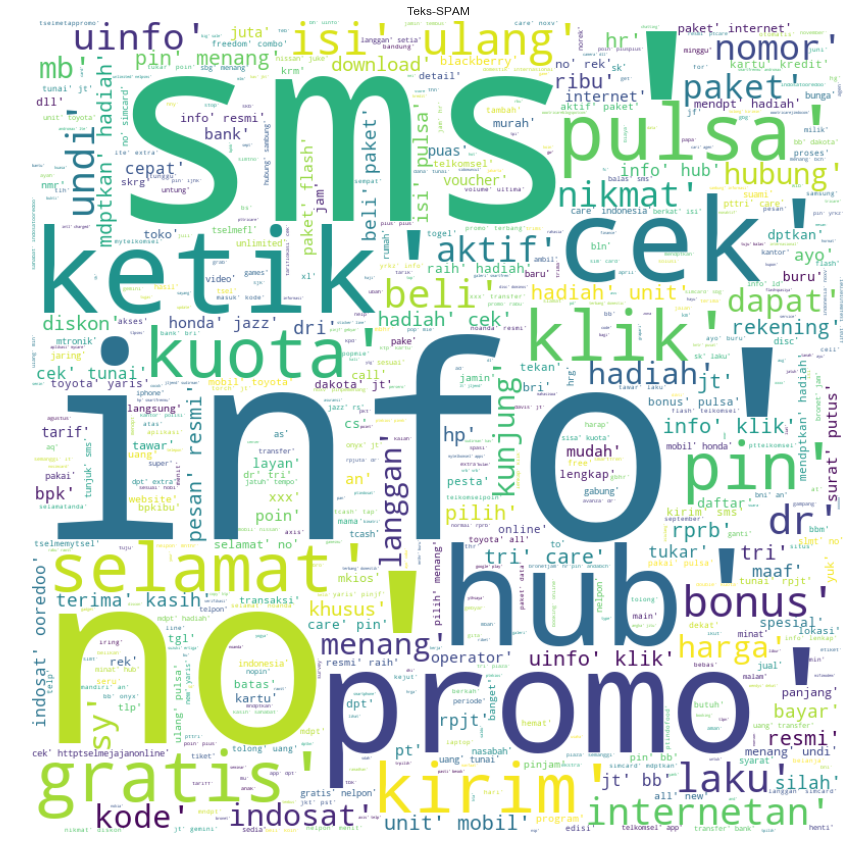

In [17]:
# Wordcloud for spam texts

spam = pesan[pesan["label"]==2]
spam_words = " ".join(comment for comment in spam["Data_Stemmer"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                 contour_width=3, contour_color='firebrick').generate(spam_words)

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Teks-SPAM")
plt.axis("off")
plt.show()

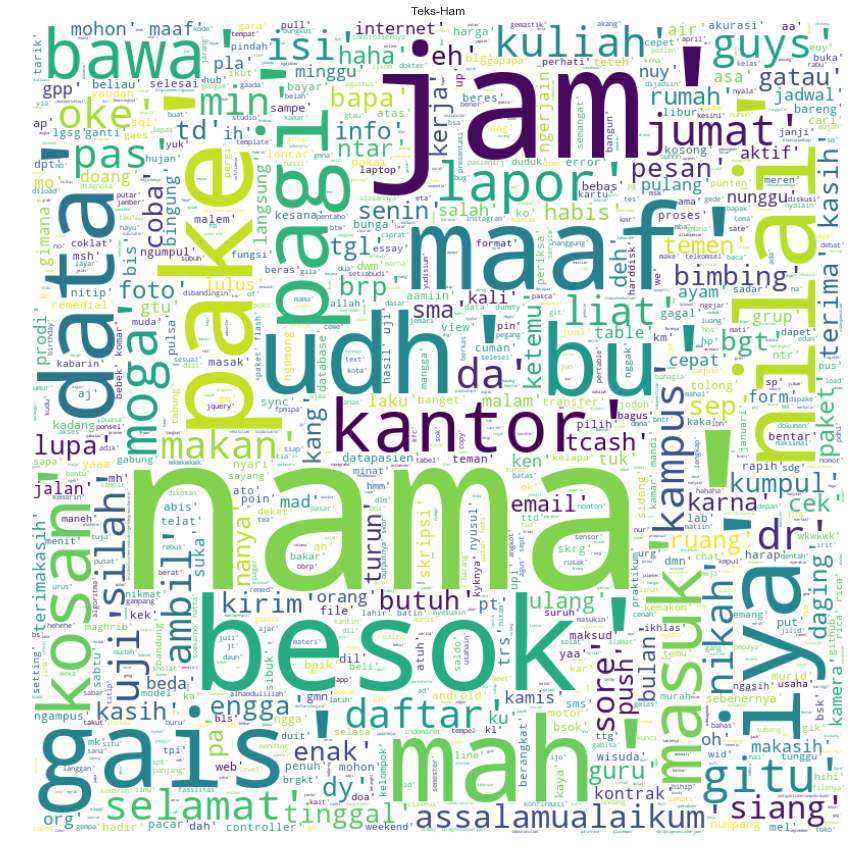

In [23]:
# Wordcloud for ham texts

ham = pesan[pesan["label"]==1]

ham_words = " ".join(comment for comment in ham["Data_Stemmer"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(ham_words)
 # Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Teks-Ham")
plt.axis("off")
plt.show()

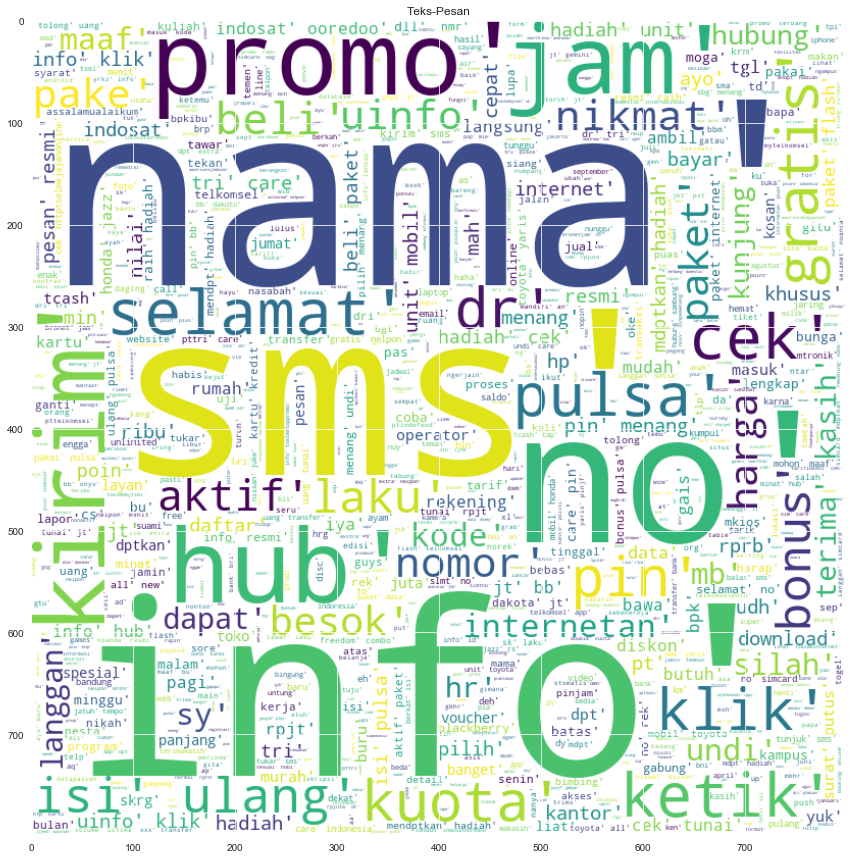

In [22]:
# Wordcloud for ham texts

#ham = pesan['Data_temmer']

semua = " ".join(comment for comment in pesan["Data_Stemmer"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(semua)
 # Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Teks-Pesan")
plt.axis("on")
plt.show()

### IV. Confucion Matrix


In [39]:
x = pesan.iloc[:,2]
y = pesan.iloc[:,-1]
x

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
1113    1
1114    1
1115    1
1116    1
1117    1
1118    1
1119    1
1120    1
1121    1
1122    1
1123    1
1124    1
1125    1
1126    1
1127    1
1128    1
1129    1
1130    1
1131    1
1132    1
1133    1
1134    1
1135    1
1136    1
1137    1
1138    1
1139    1
1140    1
1141    1
1142    1
Name: label, Length: 1143, dtype: int64

In [40]:
y

0       ['promo', 'beli', 'paket', 'flash', 'telkomsel...
1       ['ribu', 'spesial', 'pilih', 'aktif', 'promo',...
2       ['sisa', 'kuota', 'flash', 'download', 'mytelk...
3       ['sisa', 'kuota', 'flash', 'download', 'mytelk...
4       ['ribu', 'spesial', 'pilih', 'aktif', 'buru', ...
5       ['ekstra', 'pulsa', 'beli', 'paket', 'internet...
6       ['iring', 'tarif', 'hr', 'panjang', 'hr', 'hit...
7       ['eks', 'internetan', 'pake', 'volume', 'ultim...
8       ['aktif', 'iring', 'coboy', 'jr', 'hebat', 'te...
9       ['ambil', 'bonus', 'hari', 'bebas', 'pulsa', '...
10      ['henti', 'langgan', 'paket', 'flash', 'ketik'...
11      ['langgan', 'paket', 'mb', 'gg', 'mb', 'ghari'...
12      ['beli', 'paket', 'gampang', 'internetan', 'ch...
13      ['terima', 'setting', 'ponsel', 'ponsel', 'aks...
14      ['aktif', 'paket', 'bbm', 'gratis', 'laku', 'k...
15      ['kupon', 'program', 'kartu', 'as', 'biber', '...
16      ['nikmat', 'paket', 'reguler', 'sisa', 'kuota'...
17      ['daft

In [41]:
# making the dataframe
# Splitting data into Train and Test
#data latih dan data uji 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

#jumlah pesan yang dijadikan data train 80%
len(y_train)

914

In [42]:
#jumlah pesan yang dijadikan data Test 20%
len(y_test)

229

In [43]:
vectorizer = TfidfVectorizer()
y_train = vectorizer.fit_transform(y_train)
print(y_train)

  (0, 1671)	0.3103824860990008
  (0, 573)	0.39564861706733473
  (0, 2552)	0.43828168255150163
  (0, 1885)	0.41334293795247457
  (0, 2314)	0.43828168255150163
  (0, 2786)	0.43828168255150163
  (1, 2218)	0.16224402550925418
  (1, 2040)	0.22704757274878068
  (1, 948)	0.175799314337768
  (1, 1732)	0.27381105964888464
  (1, 2940)	0.27381105964888464
  (1, 2897)	0.25655204801480536
  (1, 2589)	0.14683026701390015
  (1, 860)	0.27381105964888464
  (1, 2584)	0.264312740135842
  (1, 1191)	0.16072365102856806
  (1, 2250)	0.15019248458242646
  (1, 252)	0.22364047804362483
  (1, 2248)	0.24430658438285996
  (1, 1731)	0.27381105964888464
  (1, 796)	0.30331553491490926
  (1, 2456)	0.30331553491490926
  (1, 677)	0.30331553491490926
  (2, 2040)	0.187732797185809
  (2, 2471)	0.13612449933088536
  :	:
  (912, 1020)	0.1416276491830363
  (912, 45)	0.13746920952337086
  (912, 168)	0.15327869895682958
  (912, 2810)	0.15327869895682958
  (912, 1718)	0.30655739791365916
  (912, 1482)	0.16252665743095027
  (912,

### V. Modelling using SVM

In [44]:
#from sklearn.naive_bayes import MultinomialNB
#classifier = MultinomialNB()
from sklearn.preprocessing import MultiLabelBinarizer
classifier = LinearSVC()
classifier.fit(y_train,x_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
#Uji SVM

uji_teks = ['Promo, berhadiah ayo buruan', 'besok ada aku', 'aku pergi aja','baiklah aku ikut']
uji_teks = vectorizer.transform(uji_teks)

In [46]:
klasifikasi = classifier.predict(uji_teks)
klasifikasi

array([2, 1, 1, 1], dtype=int64)

In [47]:
y_test = vectorizer.transform(y_test)
x_pred = classifier.predict(y_test)
x_pred

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int64)

In [16]:
#confusion Matrix
#import seaborn as sns
CM = confusion_matrix(x_test,x_pred)
#sns.heatmap(CM, annot=True)
print(CM)

[[117   9]
 [  5  98]]


In [23]:
presisi = precision_score(x_test, x_pred)*100
presisi

95.90163934426229

In [24]:
recall = recall_score(x_test, x_pred)*100
recall

92.85714285714286

In [25]:
f1 = f1_score(x_test, x_pred)*100
f1

94.35483870967741

In [26]:
akurasi = accuracy_score(x_test, x_pred)*100
akurasi

93.88646288209607

# The End.... Thank you!